In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_path = "Resources/unemployment-rate.csv"

In [3]:
# Read with Pandas
census_df=pd.read_csv(csv_path, parse_dates=['DATE'])
census_df


,DATE,UNRATE
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0
...,...,...
212,2017-09-01,4.3
213,2017-10-01,4.2
214,2017-11-01,4.2
215,2017-12-01,4.1


In [4]:
#Rename column UNRATE to Unemployment Rate
census_df=census_df.rename(columns={"UNRATE": "Unemployment Rate"
                                   })
census_df.head()

,DATE,Unemployment Rate
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0


In [5]:
#Create new column for indicator of high or low unemployment
census_df['Indicator'] = ["High" if x>= 5 else "Low" for x in census_df['Unemployment Rate']]
 
print(census_df)

          DATE  Unemployment Rate Indicator
0   2000-01-01                4.0       Low
1   2000-02-01                4.1       Low
2   2000-03-01                4.0       Low
3   2000-04-01                3.8       Low
4   2000-05-01                4.0       Low
..         ...                ...       ...
212 2017-09-01                4.3       Low
213 2017-10-01                4.2       Low
214 2017-11-01                4.2       Low
215 2017-12-01                4.1       Low
216 2018-01-01                4.0       Low

[217 rows x 3 columns]


In [6]:
#Create two new columns based off years and months
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE               217 non-null    datetime64[ns]
 1   Unemployment Rate  217 non-null    float64       
 2   Indicator          217 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.2+ KB


In [7]:
census_df['DATE'].dt.month_name()

0        January
1       February
2          March
3          April
4            May
         ...    
212    September
213      October
214     November
215     December
216      January
Name: DATE, Length: 217, dtype: object

In [8]:
census_df['Year']=census_df['DATE'].dt.year
census_df

,DATE,Unemployment Rate,Indicator,Year
0,2000-01-01,4.0,Low,2000
1,2000-02-01,4.1,Low,2000
2,2000-03-01,4.0,Low,2000
3,2000-04-01,3.8,Low,2000
4,2000-05-01,4.0,Low,2000
...,...,...,...,...
212,2017-09-01,4.3,Low,2017
213,2017-10-01,4.2,Low,2017
214,2017-11-01,4.2,Low,2017
215,2017-12-01,4.1,Low,2017


In [9]:
census_df['Month']=census_df['DATE'].dt.month_name()
census_df

,DATE,Unemployment Rate,Indicator,Year,Month
0,2000-01-01,4.0,Low,2000,January
1,2000-02-01,4.1,Low,2000,February
2,2000-03-01,4.0,Low,2000,March
3,2000-04-01,3.8,Low,2000,April
4,2000-05-01,4.0,Low,2000,May
...,...,...,...,...,...
212,2017-09-01,4.3,Low,2017,September
213,2017-10-01,4.2,Low,2017,October
214,2017-11-01,4.2,Low,2017,November
215,2017-12-01,4.1,Low,2017,December


In [10]:
# We only want month and year of low unemployment levels
census_low_levels_df = census_df.loc[census_df["Unemployment Rate"] < 5, [
    "Unemployment Rate", "Indicator", "Year", "Month"]]
census_low_levels_df

,Unemployment Rate,Indicator,Year,Month
0,4.0,Low,2000,January
1,4.1,Low,2000,February
2,4.0,Low,2000,March
3,3.8,Low,2000,April
4,4.0,Low,2000,May
...,...,...,...,...
212,4.3,Low,2017,September
213,4.2,Low,2017,October
214,4.2,Low,2017,November
215,4.1,Low,2017,December


In [11]:
# Create a dataframe of the averages by year.
low_level_group_df = census_low_levels_df.groupby(["Year", "Unemployment Rate"])

new_low_df = low_level_group_df.mean()
new_low_df

C:\Users\anday\AppData\Local\Temp\ipykernel_29900\1504909247.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  new_low_df = low_level_group_df.mean()


Empty DataFrame
Columns: []
Index: [(2000, 3.8), (2000, 3.9), (2000, 4.0), (2000, 4.1), (2001, 4.2), (2001, 4.3), (2001, 4.4), (2001, 4.5), (2001, 4.6), (2001, 4.9), (2005, 4.9), (2006, 4.4), (2006, 4.5), (2006, 4.6), (2006, 4.7), (2006, 4.8), (2007, 4.4), (2007, 4.5), (2007, 4.6), (2007, 4.7), (2008, 4.9), (2016, 4.7), (2016, 4.8), (2016, 4.9), (2017, 4.1), (2017, 4.2), (2017, 4.3), (2017, 4.4), (2017, 4.6), (2017, 4.7), (2018, 4.0)]

In [12]:
indicator=census_df["Indicator"].unique()
indicator

array(['Low', 'High'], dtype=object)

In [13]:
total_recessions=census_df["Indicator"].value_counts()
total_recessions

High    149
Low      68
Name: Indicator, dtype: int64

There have been 149 months of high unemployment from 2000-2018, and 68 months of low unemployment.

In [14]:
total_recessions.count()

2

In [15]:
unemployment_rate_df=census_df['Unemployment Rate']
unemployment_rate_df.describe()

count    217.000000
mean       6.104608
std        1.759887
min        3.800000
25%        4.700000
50%        5.600000
75%        7.300000
max       10.000000
Name: Unemployment Rate, dtype: float64

In [16]:
x_axis = np.arange(len(census_df))
tick_locations = [value+0.4 for value in x_axis]

<IPython.core.display.Javascript object>


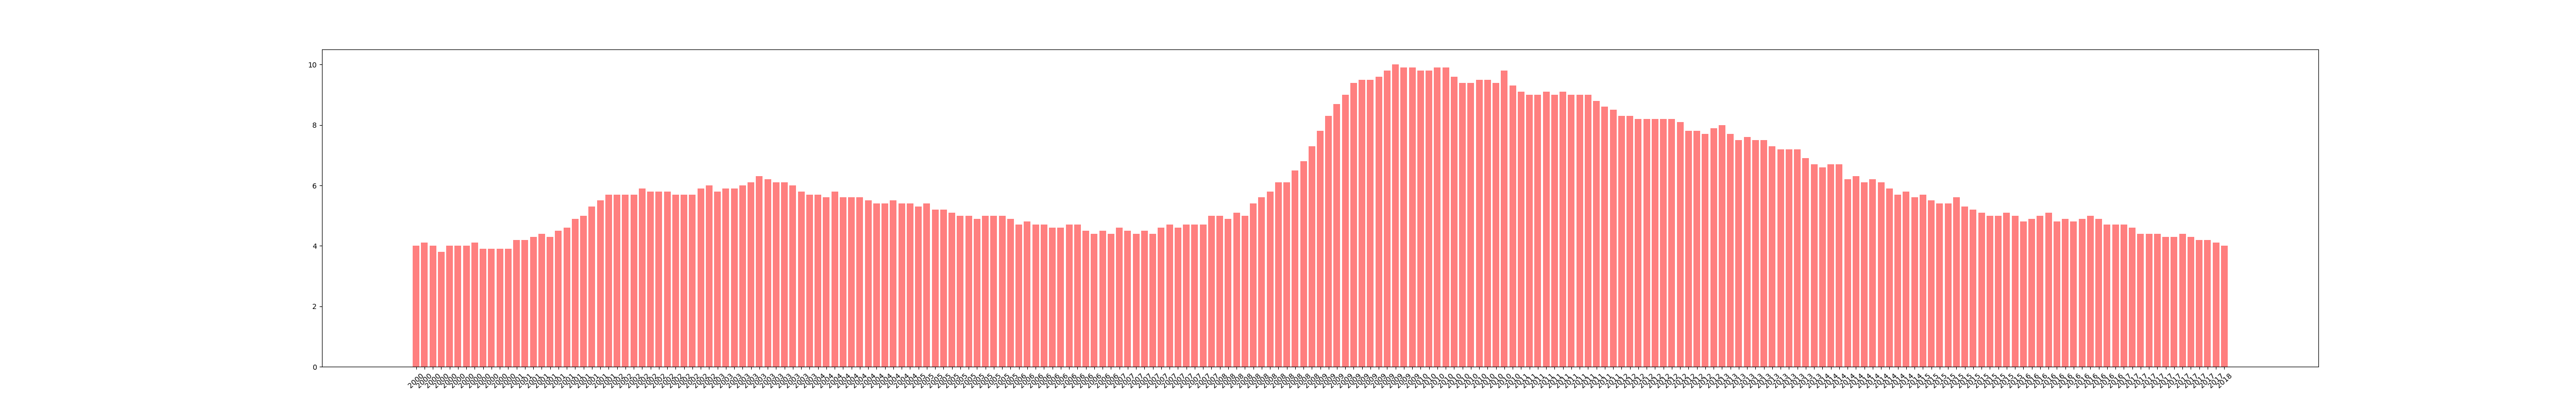

In [17]:
plt.figure(figsize=(50,8))
plt.bar(x_axis, census_df["Unemployment Rate"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, census_df["Year"], rotation=42)
plt.savefig('Unemployment_trend_year.png')

<IPython.core.display.Javascript object>


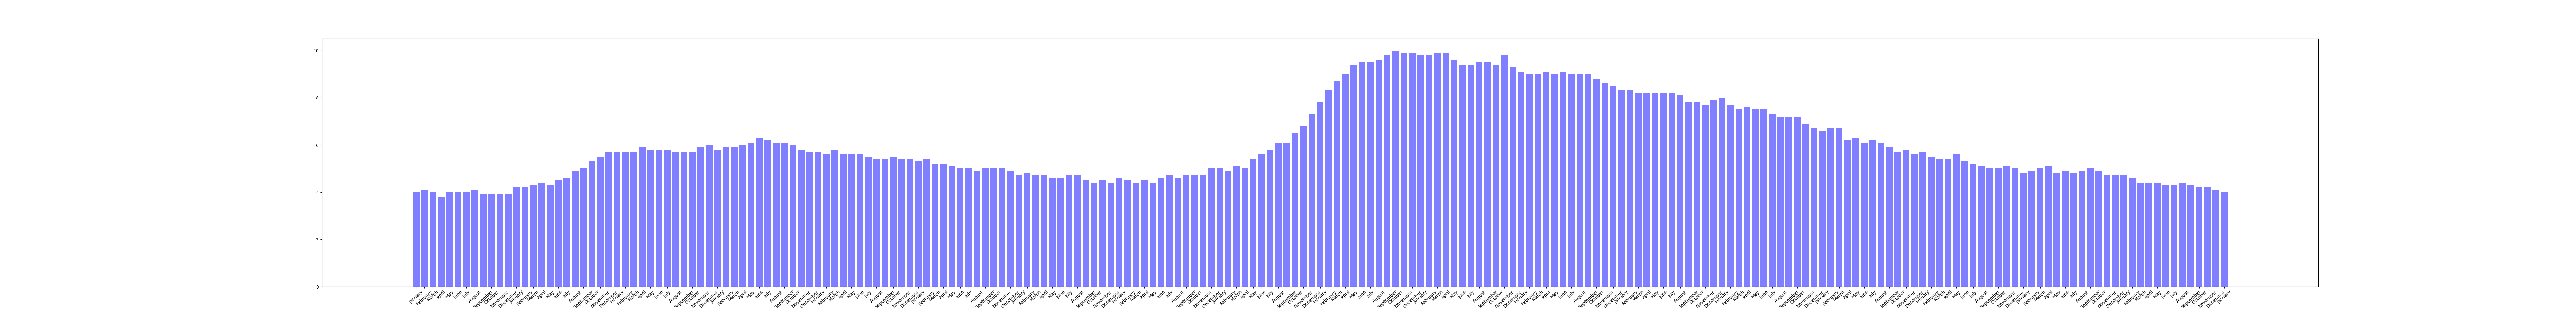

In [18]:
plt.figure(figsize=(80,10))
plt.bar(x_axis, census_df["Unemployment Rate"], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, census_df["Month"], rotation=42)
plt.savefig('Unemployment_trend_month.png')

In [19]:
#Save new columns and layout to csv

In [21]:
census_df.to_csv("Resources/new-unemployment-rate.csv", index=True)